# Analizando las estadísticas de jugadores de futbol con Pandas

![FIFA](https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/FIFA_logo_without_slogan.svg/1200px-FIFA_logo_without_slogan.svg.png)

En esta notebook, utilizarás Pandas para analizar datos de jugadores de futbol (soccer). Los datos se encuentran en forma tabular e incluyen información relevante de jugadores de futbol de todo el mundo.

---


Cada fila en el conjunto de datos contiene información sobre el jugador:
* Información personal: Nombre, nacionalidad, , edad, altura, peso y pierna preferida al jugar.
* Información como jugador: Nombre del equipo en el que juega (Club), número de playera, posición en el campo (abreviada), valor comercial y salario.
* Información sobre sus habilidades como jugador (0-100): Overall, Potential, Shooting, Defense, Passing, Physical, Control, Mental y GoalKeeping.


Durante la notebook llevarás a cabo tareas de tratamiento y análisis exploratorio de datos comunmente realizadas. Buscarás información que podría resultar útil para las organizaciones.



---



Recuerda que puedes acudir a la [documentación de Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) o a la notebook de Pandas del diplomado en ciencia de datos.



Primero, importa Pandas en tu notebook:

In [1]:
# pandas usando el alias pd
import pandas as pd
import numpy as np

Ejecuta la siguiente celda para cargar el conjunto de datos desde el repositorio en github a la máquina en colab.

In [2]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP_2022/main/01%20Programaci%C3%B3n%20en%20Python/data/fifa/players.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1955k  100 1955k    0     0  6629k      0 --:--:-- --:--:-- --:--:-- 6629k


Veamos las primeras líneas del archivo usando un comando de linux en la celda de colab:

In [3]:
!head -n 5 players.csv

ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,Preferred Foot,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
158023,L. Messi,Argentina,FC Barcelona,10.0,€110.5M,€565K,31,5'7,159lbs,Left,RF,94,94,86,41,87,80,96,95,11
20801,Cristiano Ronaldo,Portugal,Juventus,7.0,€77M,€405K,33,6'2,183lbs,Right,ST,94,94,88,41,81,86,84,91,12
190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,€118.5M,€290K,26,5'9,150lbs,Right,LW,92,93,81,42,80,79,92,92,12
193080,De Gea,Spain,Manchester United,1.0,€72M,€260K,27,6'4,168lbs,Right,GK,91,93,21,18,39,56,34,75,89


## Carga el conjunto de datos FIFA usando pandas

In [4]:
# leer el dataframe usando read_csv
fifa_df = pd.read_csv("players.csv", sep=',', header=0)
# mostrar los primeros elementos con head
fifa_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,Preferred Foot,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,€110.5M,€565K,31,5'7,159lbs,Left,RF,94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,20801,Cristiano Ronaldo,Portugal,Juventus,7.0,€77M,€405K,33,6'2,183lbs,Right,ST,94,94,88.0,41.0,81.0,86.0,84.0,91.0,12.0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,€118.5M,€290K,26,5'9,150lbs,Right,LW,92,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0
3,193080,De Gea,Spain,Manchester United,1.0,€72M,€260K,27,6'4,168lbs,Right,GK,91,93,21.0,18.0,39.0,56.0,34.0,75.0,89.0
4,192985,K. De Bruyne,Belgium,Manchester City,7.0,€102M,€355K,27,5'11,154lbs,Right,RCM,91,92,81.0,65.0,92.0,77.0,85.0,91.0,11.0


## Características del dataset

¿Qué tipos de datos contiene nuestro dataframe?

In [5]:
for name, t in zip(fifa_df.columns, fifa_df.dtypes):
  print(name, t)

ID int64
Name object
Nationality object
Club object
Jersey Number float64
Value object
Wage object
Age int64
Height object
Weight object
Preferred Foot object
Position object
Overall int64
Potential int64
Shooting float64
Defense float64
Passing float64
Physical float64
Control float64
Mental float64
GoalKeeping float64


¿Qué tamaño tiene nuestro dataset?

Utiliza el método ```shape``` para conocer el número de filas y columnas en el dataframe.

In [6]:
m,n = fifa_df.shape
print("Filas o número de jugadores:", m)
print("Columnas o caracteristicas de los jugadores:", n)

Filas o número de jugadores: 18207
Columnas o caracteristicas de los jugadores: 21


In [7]:
assert m == 18207 and n == 21, "Error en las dimensiones"

### Estadísticas generales del dataset.

Usa ```describre()``` para mostrar las estadísticas generales de las columnas numéricas en el dataframe.

In [8]:
fifa_df.describe()

,ID,Jersey Number,Age,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
count,18207.000000,18147.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,19.546096,25.122206,66.238699,71.307299,47.736274,47.459001,53.710612,64.344512,59.236357,57.958974,16.468087
std,29965.244204,15.947765,4.669943,6.908930,6.136496,15.621702,17.314439,15.113052,9.839120,15.156389,9.933340,17.002775
min,16.000000,1.000000,16.000000,46.000000,48.000000,7.000000,7.000000,8.000000,22.000000,12.000000,25.000000,1.000000
25%,200315.500000,8.000000,21.000000,62.000000,67.000000,39.000000,35.000000,46.000000,60.000000,54.000000,51.000000,10.000000
50%,221759.000000,17.000000,25.000000,66.000000,71.000000,50.000000,52.000000,57.000000,66.000000,63.000000,58.000000,11.000000
75%,236529.500000,26.000000,28.000000,71.000000,75.000000,59.000000,61.000000,64.000000,71.000000,69.000000,65.000000,12.000000
max,246620.000000,99.000000,45.000000,94.000000,95.000000,88.000000,86.000000,92.000000,89.000000,96.000000,95.000000,89.000000


## Tratamiento de datos


### Datos faltantes

Antes de poder hacer transformaciones y operaciones en los datos, es importante identificar la posible existencia de datos faltantes. El método ```isna()``` de pandas, permite obtener un dataframe booleano que identifica entradas faltantes. 

Usémos ```isna()```, ```sum(axis=0)``` y ```to_frame().T``` para resumir el resultado de datos faltantes como un conteo por columnas:

In [9]:
fifa_df.isna().sum(axis=0).to_frame().T # La letra T al final lo muestra en forma de filas

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,Preferred Foot,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,0,0,0,241,60,0,0,0,48,48,48,60,0,0,48,48,48,48,48,48,48


Una manera de tratar con datos faltantes, es eliminar las filas que contienen uno o más datos faltantes, dejando solo registros completos.

Ya que para nuestro conjunto de datos la cantidad de faltantes es mínima, podemos usar esta estrategia.

Completa la siguiente celda para eliminar filas (```axis=0```) que contengan algún dato faltante (```dropna```):

In [10]:
t_df = fifa_df.dropna(axis=0, how='any')

Verifica que no hay más datos faltantes:

In [11]:
empty_columns = t_df.isna().sum(axis=0).to_frame().T
empty_columns

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,Preferred Foot,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
assert empty_columns.values.sum() == 0, "Error, aun hay datos faltantes"

Finalmente, reemplazar el dataframe original por el nuevo sin elementos faltantes.

In [13]:
fifa_df = t_df

### Transformaciones

Las celdas fueron inferidas como tipo ```object``` por pandas. Algunas de éstas contienen datos numéricos que podrían ser útiles para el análisis. 

Por ejemplo, las columnas ```Wage``` y ```Value``` contienen datos sobre el salario y el valor en el mercado de cada jugador. Ambas columnas contienen el signo de la moneda (€) al inicio y al final pueden contener la abreviación de cantidades (K miles, M millones). 

Debemos realizar un tratamiento de datos en tales columnas para poder usarlas de manera numérica.

Primero, confirmemos que solo tenemos casos donde las cantidades terminan en K, M o sin abreviaturas. Usemos funciones de agregación.

Contemos las veces que aparecen los distintos caracteres al final de los registros en la columna ```Wage```:

In [14]:
fifa_df[["Wage"]].groupby(fifa_df.Wage.str[-1]).count()

,Wage
Wage,
K,17918


Contemos las veces que aparecen los distintos caracteres al final de los registros en la columna ```Value```:

In [14]:
fifa_df[["Value"]].groupby(fifa_df.Value.str[-1]).count()

,Value
Value,
0,11
K,11060
M,6847


In [15]:
def wage_valor(currency1):
  fifa_df[["Wage"]]

  return fifa_df[["Wage"]]

In [16]:
new = fifa_df["Wage"].str.replace("€","")
new = fifa_df["Wage"].str.replace("K","000")

type(new)
#new1 = new["Wage"].str.replace("K", "000")
#new

pandas.core.series.Series

In [17]:
def currency_to_numeric(currency):
  #fifa_df[["Wage"]]
  """
  La funcion recibe valores monetarios en un objeto de texto, los tranforma:
  1- Elimina el simbolo de la moneda al inicio de la cadena
  2- Extrae el caracter adicional al final de la cadena que indica el
     multiplo de la cantidad (abreviatura). No siempre hay un simbolo.
  3- Usa el valor para devolver la cantidad en numero (multiplica por el valor).
  Ej: 250K pasa a 250000
  ya que
  1K = 1000
  1M = 1000000
  Sin letra solo parte numerica
  """
  # el multiplo de K o M
  symbols = {"K": 1000, "M": 1000000}
  # Actualiza el valor de numeric con la cantidad en currency
  numeric = 0.0
  c = currency[-1] 
  if c in symbols:
    numeric = float(currency[1:-1]) * symbols[c]
  else:
    numeric = float(currency[1:])
  # <completa>
  
  return numeric 

Prueba tu función:

In [18]:
currency_to_numeric("$20")

20.0

In [19]:
assert currency_to_numeric("$20") == 20.0 and currency_to_numeric("$50K") == 50*10.0**3 and currency_to_numeric("$10M") == 10*10.0**6, "Error"

Cambia las columnas ```Wage``` y ```Value``` a numéricos usando ```currency_to_numeric``` elemento por elemento con ```applymap```:

In [20]:
fifa_df[["Wage", "Value"]] = fifa_df[["Wage", "Value"]].applymap(currency_to_numeric)
fifa_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,Preferred Foot,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,Left,RF,94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,20801,Cristiano Ronaldo,Portugal,Juventus,7.0,77000000.0,405000.0,33,6'2,183lbs,Right,ST,94,94,88.0,41.0,81.0,86.0,84.0,91.0,12.0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,118500000.0,290000.0,26,5'9,150lbs,Right,LW,92,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0
3,193080,De Gea,Spain,Manchester United,1.0,72000000.0,260000.0,27,6'4,168lbs,Right,GK,91,93,21.0,18.0,39.0,56.0,34.0,75.0,89.0
4,192985,K. De Bruyne,Belgium,Manchester City,7.0,102000000.0,355000.0,27,5'11,154lbs,Right,RCM,91,92,81.0,65.0,92.0,77.0,85.0,91.0,11.0


### Suplementando la información

En el set de datos, tenemos una columna ```Position``` que indica la posición en la que el jugador se desempeña en el campo. Algo que podrás notar, es que originalmente la posición está de manera abreviada, si no conoces las abreviaturas, será complicado saber en qué posición juega cada jugador. 


Para solucionar esto, usémos otro set de datos para cambiar de abreviatura a algo más descriptivo, pero manteniendo la abreviatura.

La siguiente imágen muestra las posiciónes más comunes en el campo:
![Posiciones de juego](https://raw.githubusercontent.com/jhermosillo/DIPLOMADO_CDP/main/01%20Programaci%C3%B3n%20en%20Python/images/SoccerFieldPositions.png)


Vamos a utilizar un nuevo set de datos que contiene la abreviatura de cada posición (```Abbreviation```) y su significado (```Full```).

Carga el archivo desde github a colab con la siguiente celda:

In [21]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP_2022/main/01%20Programaci%C3%B3n%20en%20Python/data/fifa/positions.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   772  100   772    0     0   3918      0 --:--:-- --:--:-- --:--:--  3918


Ejecuta la siguiente celda para crear y ver el nuevo dataframe con los datos de las posiciones:

In [22]:
positions_df = pd.read_csv("positions.csv", header=0, skipinitialspace=True)
positions_df.head()

,Abbreviation,Full
0,GK,Goalkeeper
1,SW,Sweeper
2,CB,Center Back
3,LCB,Left Center Back
4,RCB,Right Center Back


Utiliza el nuevo dataframe para actualizar la columna ```Position``` en el dataframe de jugadores por la posición descriptiva + abreviada.

Primero, debemos de *unir* ambos dataframes, ambos comparten una columna (pero tienen diferentes nombre) la posición abreviada.

Utiliza un método de pandas para unir el dataframe ```fifa_df``` con ```positions_df```.

*Tip: Queremos unir cada fila de la **izquierda** (cada jugador) con una sola fila de la **derecha** (su posición completa en el campo).*

In [23]:
positions_df.rename(columns={'Abbreviation':'Position',}, inplace=True)
merged_df = fifa_df.merge(positions_df, on='Position')

In [24]:
merged_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,Preferred Foot,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Full
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,Left,RF,94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0,Right Forward
1,175943,D. Mertens,Belgium,Napoli,14.0,45000000.0,135000.0,31,5'7,134lbs,Right,RF,87,87,74.0,46.0,78.0,77.0,91.0,84.0,8.0,Right Forward
2,172114,D. Valeri,Argentina,Portland Timbers,8.0,11500000.0,12000.0,32,5'10,165lbs,Right,RF,80,80,79.0,46.0,78.0,69.0,78.0,82.0,12.0,Right Forward
3,150516,L. Podolski,Germany,Vissel Kobe,10.0,6500000.0,11000.0,33,6'0,183lbs,Left,RF,78,78,80.0,49.0,73.0,73.0,75.0,78.0,11.0,Right Forward
4,201313,C. Ciano,Italy,Frosinone,28.0,6500000.0,17000.0,28,5'9,161lbs,Left,RF,75,75,70.0,32.0,72.0,72.0,77.0,72.0,9.0,Right Forward


In [25]:
merged_df.columns.shape

(22,)

In [26]:
# Hicimos un merge sobre la posición de los jugadores solo se agrega una nueva columna y así quedan en orden
assert len(merged_df.columns) == 22, "Error"
print("La union de ambos dataframes contiene ", len(merged_df.columns), " columnas")

#assert len(merged_df.columns) == 23, "Error"
#print("La union de ambos dataframes contiene ", len(merged_df.columns), " columnas")

La union de ambos dataframes contiene  22  columnas


Usemos la nueva columna ```Full``` para actualizar la columna ```Position``` para que contenga el significado y abreviatura de la posición:

```merged_df["Full"] + " (" + merged_df["Position"] +")"```

In [27]:
merged_df["Position"] = merged_df["Full"] + " (" + merged_df["Position"] +")"
#merged_df["Position"] = (merged_df["Position"])+ merged_df["Full"] 

Muestra la columna actualizada:

In [28]:
merged_df["Position"].head(3)

0    Right Forward (RF)
1    Right Forward (RF)
2    Right Forward (RF)
Name: Position, dtype: object

Ahora, tenemos algunas columnas adicionales que ya no son útiles.

Eliminemos las columnas ```Abbreviation``` y ```Full``` del dataframe usando ```drop()```:

In [29]:
#merged_df = merged_df.drop(["Abbreviation", "Full"], axis=1)
merged_df = merged_df.drop(["Full"], axis=1)

In [30]:
merged_df.head(3)

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,Preferred Foot,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,Left,Right Forward (RF),94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,175943,D. Mertens,Belgium,Napoli,14.0,45000000.0,135000.0,31,5'7,134lbs,Right,Right Forward (RF),87,87,74.0,46.0,78.0,77.0,91.0,84.0,8.0
2,172114,D. Valeri,Argentina,Portland Timbers,8.0,11500000.0,12000.0,32,5'10,165lbs,Right,Right Forward (RF),80,80,79.0,46.0,78.0,69.0,78.0,82.0,12.0


In [31]:
assert len(merged_df.columns) == 21, "Error"

Asignemos al dataframe original ```fifa_df``` el nuevo dataframe con el tratamiento de datos ya realizado:

In [32]:
fifa_df = merged_df
fifa_df.head(3)

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,Preferred Foot,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,Left,Right Forward (RF),94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,175943,D. Mertens,Belgium,Napoli,14.0,45000000.0,135000.0,31,5'7,134lbs,Right,Right Forward (RF),87,87,74.0,46.0,78.0,77.0,91.0,84.0,8.0
2,172114,D. Valeri,Argentina,Portland Timbers,8.0,11500000.0,12000.0,32,5'10,165lbs,Right,Right Forward (RF),80,80,79.0,46.0,78.0,69.0,78.0,82.0,12.0


In [33]:
fifa_df.iloc[:, 1]  #Muetsra las columnas por índice 

0              L. Messi
1            D. Mertens
2             D. Valeri
3           L. Podolski
4              C. Ciano
              ...      
17913            Lu Yao
17914          R. Giles
17915         K. Rowles
17916    F. Fridriksson
17917      E. Dahlqvist
Name: Name, Length: 17918, dtype: object

## Análisis exploratorio

En esta sección, utilizarás distintos métodos de los dataframes de pandas para generar un análisis exploratorio. En un análisis exploratorio, se busca explorar, resumir y entender los datos.

### Jugadores con el mayor valor comercial y jugadores mejores pagados

Muestra el **Top 3** de jugadores con mayor valor (```Value```) en el mercado.

In [34]:
fifa_df.sort_values('Value', ascending=False).head(3)

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,Preferred Foot,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
2146,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,118500000.0,290000.0,26,5'9,150lbs,Right,Left Wing (LW),92,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,Left,Right Forward (RF),94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
4512,192985,K. De Bruyne,Belgium,Manchester City,7.0,102000000.0,355000.0,27,5'11,154lbs,Right,Right Center Midfield (RCM),91,92,81.0,65.0,92.0,77.0,85.0,91.0,11.0


Muestra el **Top 3** de jugadores mejores pagados en el mundo (Salarios más altos, ```Wage```).

In [35]:
fifa_df.sort_values('Wage', ascending = False).head(3)

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,Preferred Foot,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,Left,Right Forward (RF),94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
4914,176580,L. Suárez,Uruguay,FC Barcelona,9.0,80000000.0,455000.0,31,6'0,190lbs,Right,Right Side (RS),91,91,86.0,56.0,74.0,81.0,87.0,87.0,31.0
4513,177003,L. Modrić,Croatia,Real Madrid,10.0,67000000.0,420000.0,32,5'8,146lbs,Right,Right Center Midfield (RCM),91,91,76.0,74.0,89.0,79.0,92.0,89.0,10.0


### Potencial por alcanzar

Utiliza operaciones Crea una nueva columna que  muestre el potencial por alcanzar ```Potential left``` de cada jugador en el conjunto de datos. El potencial por alcanzar puede ser calculado mediante ```Potential - Overall```.

In [36]:
#fifa_df.info() # Verificamos que tipo de datos son
#fifa_df['Potential']
fifa_df["Potential left"] = fifa_df['Potential'] - fifa_df['Overall']
fifa_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,Preferred Foot,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Potential left
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,Left,Right Forward (RF),94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0,0
1,175943,D. Mertens,Belgium,Napoli,14.0,45000000.0,135000.0,31,5'7,134lbs,Right,Right Forward (RF),87,87,74.0,46.0,78.0,77.0,91.0,84.0,8.0,0
2,172114,D. Valeri,Argentina,Portland Timbers,8.0,11500000.0,12000.0,32,5'10,165lbs,Right,Right Forward (RF),80,80,79.0,46.0,78.0,69.0,78.0,82.0,12.0,0
3,150516,L. Podolski,Germany,Vissel Kobe,10.0,6500000.0,11000.0,33,6'0,183lbs,Left,Right Forward (RF),78,78,80.0,49.0,73.0,73.0,75.0,78.0,11.0,0
4,201313,C. Ciano,Italy,Frosinone,28.0,6500000.0,17000.0,28,5'9,161lbs,Left,Right Forward (RF),75,75,70.0,32.0,72.0,72.0,77.0,72.0,9.0,0


### Jóvenes promesa

Utiliza las funciones de Pandas para encontrar el **top 5** de jugadores "promesa" menores de 22 años. Ordena ascendentemente el dataframe según el potencial (```Potential```), potencial por alcanzar (```Potential left```) y su nivel (```Overall ```) actual.

In [37]:
# We use the condition that they are under 22 years old and ordered according to Potential, Potencial left and Overall. 
fifa_df[fifa_df.Age < 22].sort_values(by=['Potential','Potential left', 'Overall'], ascending = False).head(5)

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,Preferred Foot,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Potential left
10876,231747,K. Mbappé,France,Paris Saint-Germain,10.0,81000000.0,100000.0,19,5'10,161lbs,Right,Right Midfielder (RM),88,95,76.0,45.0,77.0,85.0,88.0,85.0,8.0,7
2553,230621,G. Donnarumma,Italy,Milan,22.0,29000000.0,23000.0,19,6'5,198lbs,Right,Goalkeeper (GK),82,93,16.0,18.0,23.0,54.0,31.0,64.0,81.0,11
2170,238794,Vinícius Júnior,Brazil,Real Madrid,28.0,17500000.0,66000.0,17,5'9,161lbs,Right,Left Wing (LW),77,92,67.0,35.0,61.0,81.0,81.0,71.0,7.0,15
31,230666,Gabriel Jesus,Brazil,Manchester City,33.0,41000000.0,130000.0,21,5'9,161lbs,Right,Striker (ST),83,92,74.0,43.0,69.0,83.0,87.0,82.0,10.0,9
14654,231443,O. Dembélé,France,FC Barcelona,11.0,40000000.0,155000.0,21,5'10,148lbs,Left,Right Wing (RW),83,92,71.0,44.0,75.0,77.0,86.0,80.0,10.0,9


### Mejor defensa en el mundo

Encuentra al jugador con el mayor puntaje en la columna ```Defense```:

*Tip: utiliza el método ```idxmax``` para encontrar la fila donde se encuentra el mejor defensa. Después usa el índice para acceder a los datos de la fila.*

In [38]:
idx = fifa_df['Defense'].idxmax()
fifa_df[["Name", "Club", "Defense", "Position"]].loc[idx] #Mejor usar el método de abajo ¿Que pasa si hay varios maximos?

Name                               N. Kanté
Club                                Chelsea
Defense                                86.0
Position    Left Defensive Midfielder (LDM)
Name: 7910, dtype: object

In [39]:
fifa_df[['Name','Club','Defense','Position']].sort_values('Defense', ascending = False).head(3)

,Name,Club,Defense,Position
8156,R. Nainggolan,Inter,86.0,Central Attacking Midfielder (CAM)
7910,N. Kanté,Chelsea,86.0,Left Defensive Midfielder (LDM)
9098,Casemiro,Real Madrid,84.0,Central Defensive Midfielder (CDM)


### Porcentaje pie preferido

Calcula el porcentaje mundial de jugadores que prefieren utilizar su pierna derecha para controlar el balón y el porcentaje que prefiere utilizar la pierna izquierda.

*Tip: El método ```value_counts()``` de objetos Series podría resultarte particularmente útil para esta tarea.*

In [40]:
fifa_df['Preferred Foot'].value_counts(normalize=True)*100

Right    76.771961
Left     23.228039
Name: Preferred Foot, dtype: float64

### Equipos con mayor talento promedio

Utiliza funciones de agregación y de agrupamiento para obtener a los equipos con el mejor promedio de nivel (```Overall```) entre sus jugadores.

In [41]:
fifa_df['Club'].value_counts()

FC Barcelona       33
Rayo Vallecano     33
Atlético Madrid    33
RC Celta           33
AS Monaco          33
                   ..
Cruzeiro           20
Tromsø IL          20
Sligo Rovers       19
Limerick FC        19
Derry City         18
Name: Club, Length: 651, dtype: int64

In [42]:
#for i in fifa_df['Club']:
np.mean(fifa_df[fifa_df.Club == "Real Madrid"].Overall) 

78.24242424242425

In [44]:
fifa_df.head(5)

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,Preferred Foot,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Potential left
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,Left,Right Forward (RF),94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0,0
1,175943,D. Mertens,Belgium,Napoli,14.0,45000000.0,135000.0,31,5'7,134lbs,Right,Right Forward (RF),87,87,74.0,46.0,78.0,77.0,91.0,84.0,8.0,0
2,172114,D. Valeri,Argentina,Portland Timbers,8.0,11500000.0,12000.0,32,5'10,165lbs,Right,Right Forward (RF),80,80,79.0,46.0,78.0,69.0,78.0,82.0,12.0,0
3,150516,L. Podolski,Germany,Vissel Kobe,10.0,6500000.0,11000.0,33,6'0,183lbs,Left,Right Forward (RF),78,78,80.0,49.0,73.0,73.0,75.0,78.0,11.0,0
4,201313,C. Ciano,Italy,Frosinone,28.0,6500000.0,17000.0,28,5'9,161lbs,Left,Right Forward (RF),75,75,70.0,32.0,72.0,72.0,77.0,72.0,9.0,0


In [45]:
#fifa_df.sort_values('Overall',ascending=True).groupby("Club").Overall.mean().head(5)
#fifa_df.groupby("Club").Overall.mean().head(5)
fifa_df.groupby('Club').mean().sort_values('Overall',ascending=False).Overall.head(5).to_frame()

,Overall
Club,
Juventus,82.280000
Napoli,80.000000
Inter,79.750000
Real Madrid,78.242424
Milan,78.074074


### Equipos con más costosos (valor comercial)

Utiliza funciones de agregación y agrupamiento para encontrar el valor total de de cada club, esto es, la suma de los valores individuales de los jugadores de los Club.

Ordena de manera descendente para mostrar los clubs más costosos del mundo.

In [46]:
#fifa_df.groupby('Club').mean().sort_values('Overall',ascending=False).Overall.head(5)
fifa_df.groupby('Club').sum().sort_values('Value',ascending=False).Value.head(5)

Club
Real Madrid          874425000.0
FC Barcelona         852600000.0
Manchester City      786555000.0
Juventus             704475000.0
FC Bayern München    679025000.0
Name: Value, dtype: float64

### ¿Qué equipos tienen más mexicanos?

Muestra un top 5 de equipos con más jugadores mexicanos en el mundo.

Primero, crea un dataframe que contiene unicamente jugadores mexicanos:

*Tip: Filtra el dataframe usando ```Nationality==Mexico```*.

In [47]:
fifa_df[fifa_df.Age < 22].sort_values(by=['Potential','Potential left', 'Overall'], ascending = False).head(5)

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,Preferred Foot,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Potential left
10876,231747,K. Mbappé,France,Paris Saint-Germain,10.0,81000000.0,100000.0,19,5'10,161lbs,Right,Right Midfielder (RM),88,95,76.0,45.0,77.0,85.0,88.0,85.0,8.0,7
2553,230621,G. Donnarumma,Italy,Milan,22.0,29000000.0,23000.0,19,6'5,198lbs,Right,Goalkeeper (GK),82,93,16.0,18.0,23.0,54.0,31.0,64.0,81.0,11
2170,238794,Vinícius Júnior,Brazil,Real Madrid,28.0,17500000.0,66000.0,17,5'9,161lbs,Right,Left Wing (LW),77,92,67.0,35.0,61.0,81.0,81.0,71.0,7.0,15
31,230666,Gabriel Jesus,Brazil,Manchester City,33.0,41000000.0,130000.0,21,5'9,161lbs,Right,Striker (ST),83,92,74.0,43.0,69.0,83.0,87.0,82.0,10.0,9
14654,231443,O. Dembélé,France,FC Barcelona,11.0,40000000.0,155000.0,21,5'10,148lbs,Left,Right Wing (RW),83,92,71.0,44.0,75.0,77.0,86.0,80.0,10.0,9


In [48]:
players_mx_df = fifa_df[fifa_df['Nationality'] == 'Mexico'].dropna(axis=0, how='any')
players_mx_df.head(5)

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,Preferred Foot,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Potential left
77,178224,J. Hernández,Mexico,West Ham United,17.0,12000000.0,90000.0,30,5'9,161lbs,Right,Striker (ST),79,79,71.0,37.0,62.0,72.0,76.0,77.0,12.0,0
250,192930,A. Pulido,Mexico,Guadalajara,9.0,6500000.0,35000.0,27,5'10,168lbs,Right,Striker (ST),74,75,68.0,40.0,63.0,75.0,70.0,68.0,11.0,1
391,224151,H. Martín,Mexico,Club América,21.0,4000000.0,41000.0,25,5'10,161lbs,Right,Striker (ST),72,75,66.0,40.0,64.0,75.0,73.0,69.0,10.0,3
412,214727,A. Zaldívar,Mexico,Guadalajara,14.0,4200000.0,25000.0,24,5'10,168lbs,Left,Striker (ST),72,77,67.0,47.0,61.0,74.0,69.0,59.0,10.0,5
461,217710,M. Barragán,Mexico,Club Necaxa,9.0,2800000.0,10000.0,26,5'10,168lbs,Right,Striker (ST),71,72,67.0,37.0,59.0,74.0,67.0,60.0,8.0,1


Agrupa por el nombre del club y cuenta:

In [49]:
#fifa_df.groupby('Club').mean().sort_values('Overall',ascending=False).Overall.head(5)
#players_mx_df.groupby('Club').sum().head(5)
players_mx_df['Club'].value_counts().head(5).to_frame()

,Club
Guadalajara,29
U.N.A.M.,21
Club Atlas,20
Club Necaxa,20
Tigres U.A.N.L.,19


## Visualización

Utiliza las opciones de visualización de Pandas.

### Histograma de las edades de los jugadores de futbol

Selecciona la columna ``Age``` del dataframe ```fifa_df``` y muestra el histograma usando las opciones de visualización de Pandas:

In [50]:
import seaborn as sns
sns.set()

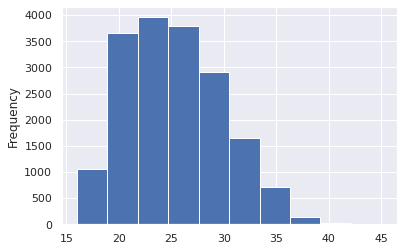

In [51]:
fifa_df.Age.plot.hist(bins=10)

### Gráfica de Pie (Preferred Foot)

Selecciónes el conteo de valores del pie preferido (columna ```Preferred Foot```) y muestra la información mediante una gráfica de Pie:

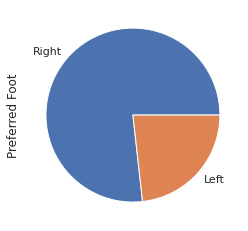

In [52]:
import matplotlib as plt
#fifa_df.head(5)
fifa_df['Preferred Foot'].value_counts().plot.pie()

### Gráfica de dispersión Edad vs Potential left

Ahora, utiliza una gráfica de dispersión para visualizar el comportamiento del potencial por alcanzar (```Potential left```) de acuerdo a las edades de los jugadores:

*Tip: La gráfica debe mostrar la edad en un eje y el potencial por alcanzar en el otro.*

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


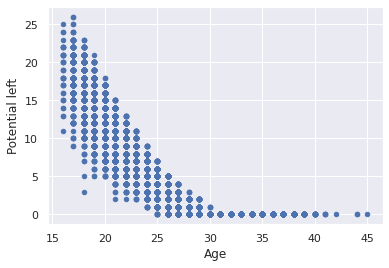

In [53]:
fifa_df.plot.scatter(y='Potential left', x='Age')

¿Qué otras variables o mezcla de variables sería interesante visualizar?

# Desafío Adicional

En la práctica con Numpy, creaste un modelo para identificar imágenes de dígitos escritos a mano. 

Para este nuevo conjunto de datos, ¿podrías usar una metodología similar para encontrar la posición en el campo de un jugador solamente usando los valores de su habilidades? 

Skills: ```Shooting 	Defense 	Passing 	Physical 	Control 	Mental 	GoalKeeping```

In [54]:
import numpy as np
from matplotlib import pyplot as plt

In [56]:
# fifa_df.groupby('Club').sum().sort_values('Value',ascending=False).Value.head(5)
fifa_df.groupby('Position').mean().sort_values(by=['Shooting', 'Defense', 'Passing', 'Physical', 'Control', 'Mental', 'GoalKeeping']).head(5)

,ID,Jersey Number,Value,Wage,Age,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Potential left
Position,,,,,,,,,,,,,,,
Goalkeeper (GK),207831.146586,20.632028,1.612086e+06,6916.666667,26.017068,64.562751,69.796687,15.380522,14.323293,22.441265,44.127510,25.601908,47.028112,63.721386,5.233936
Center Back (CB),216536.800456,19.087229,1.607292e+06,7810.148233,24.812999,64.992018,70.892246,39.440707,57.958381,47.750285,61.099202,49.531927,51.751425,10.505701,5.900228
Right Center Back (RCB),206496.921779,13.260736,3.092776e+06,12883.435583,26.980061,69.315951,72.253067,42.342025,61.849693,52.161043,62.914110,52.124233,56.340491,10.639571,2.937117
Left Center Back (LCB),204911.594976,13.651491,3.062378e+06,11697.017268,27.012559,69.202512,72.298273,42.695447,61.927786,53.284144,63.262166,53.058085,56.555730,10.599686,3.095761
Right Back (RB),215798.432965,18.372240,1.718659e+06,8760.252366,25.261041,66.032334,70.481073,45.956625,62.031546,59.787855,69.716877,64.189274,57.250000,10.530757,4.448738


In [57]:
# creamos un nuevo DF con las habilidades y la posición
fifa_np = fifa_df[['Position','Shooting', 'Defense', 'Passing', 'Physical', 'Control', 'Mental', 'GoalKeeping']].to_numpy()
fifa_np

array([['Right Forward (RF)', 86.0, 41.0, ..., 96.0, 95.0, 11.0],
       ['Right Forward (RF)', 74.0, 46.0, ..., 91.0, 84.0, 8.0],
       ['Right Forward (RF)', 79.0, 46.0, ..., 78.0, 82.0, 12.0],
       ...,
       ['Left Wing Back (LWB)', 30.0, 49.0, ..., 43.0, 38.0, 10.0],
       ['Left Wing Back (LWB)', 32.0, 53.0, ..., 59.0, 44.0, 11.0],
       ['Left Wing Back (LWB)', 28.0, 47.0, ..., 58.0, 45.0, 10.0]],
      dtype=object)

## Separando los datos.

En la siguiente celda, se va a completar el código para separar el conjunto de datos en dos, un conjunto ```X``` que contendrá únicamente las habilidades de los jugadores y un conjunto ```y``` que contendrá las etiquetas asociadas a las posiciones.

Utiliza slicing con NumPy para seleccionar los elementos adecuados.

In [82]:
print(fifa_np.shape)
'''
En el cjto MNist cada fila contiene los píxeles de cada digito, 
en primera entrada de cada fila ([0]): se encuentra la etiqueta de cada dígito 
'''
X = fifa_np[:,1:].astype(float) # Todas las filas empezando desde 0 y todas las columnas empezando desde 1. 
y = fifa_np[:,0] # Todas las filas empezando desde 0 y solo toma la primera columna ([0])
print(X.shape)
print(y.shape)

(17918, 8)
(17918, 7)
(17918,)


In [81]:
print(y[0]) # Etiqueta de la posición en el campo.
print(X[1]) # Habilidades 

Right Forward (RF)
[74. 46. 78. 77. 91. 84.  8.]


## Contando el número de ejemplos para cada "clase"

La función ```count_class_examples()``` para imprimir el número de ejemplos de cada etiqueta en el set de datos. Esto es, el número de RF, CB, LWB (posiciones)

In [60]:
y_num_classes = set(y)
len(y_num_classes)

27

In [61]:
from numpy.core.numeric import count_nonzero
def count_class_examples(y):
  """Imprime el numero de ejemplos para cada clase en y.
  
  Argumentos
  y - arreglos de numpy que contiene etiquetas
  """
  # Cunatas posiciones existen 
  y_num_classes = set(y)
  suma = 0
  for i in y_num_classes:
    count = np.count_nonzero(y==i) # Cuenta el número de veces cada que y es igual i.
    #print("Numero de ", i, count)  # De manera alternativa np.suma(y==i) devueleve false o true, generando la suma.
    suma = suma + count
  print("El número total de la suma es:", suma)
  if suma == y.shape[0]:
    print("La función es correcta")
  else:
    print("Error") 

  

In [62]:
count_class_examples(y)

El número total de la suma es: 17918
La función es correcta


## Calcula el arreglo representativo para cada clase

Utiliza Numpy para encontrar el arreglo representativo promediando los arreglos para cada clase. Rellena la función ``` class_means``` para que devuelva un arreglo de NumPy que contenga en cada fila el arreglo promedio de los respectivos ejemplos (de cada una de las pocisiones).

In [64]:
def class_means(X, y):
  """
  Calcula el arreglo promedio (representativo) de cada clase
  """
  # Numero de ejemplos (filas) (número de ejemplos: 17,918)
  m = X.shape[0]
  # Numero de features (columnas) (7 habilidades) (representación para cada una de las habilidades)
  n = X.shape[1]
  # Clases distintas en el set (las posiciones en el campo) (arreglo o vector numpy)
  ulabels = np.unique(y)
  # Numero de clases (el numero total: 27, como escalar)
  classes = ulabels.size

  # Rellena means con el arreglo promedio de cada clase
  means = np.empty((classes, n))

  for i in range(classes):
    means[i,:] = np.mean(X[y == ulabels[i]],axis=0)

  return means

In [65]:
class_representatives = class_means(X, y)

#shape del arreglo que contiene los representativos
class_representatives.shape

(27, 7)

In [66]:
assert np.array_equal(class_means(np.array([[4, 6], [2, 4], [10, 4], [2, 6]]), np.array([1, 2, 1, 2])), np.array([[7, 5], [2, 5]])), "Error"
assert class_representatives.shape == (27, 7), "Error en las dimensiones de class_representatives"
print("Funcion clas_means es correcta")

Funcion clas_means es correcta


In [67]:
def euclidean_distance(P, Q):
  """
  Calcula la distancia euclidiana entre los elementos de P y Q
  """
  """
  #e_distance = []
  e_distance = np.sqrt(np.sum((P-Q)**2,axis=1))
  """
  #Forma alternativa 
  #e_distance = []
  e_distance = np.linalg.norm(P-Q,axis=1)
  return e_distance

In [68]:
assert euclidean_distance(np.array([[1, 2, 3]]), np.array([[3, 3, 5]]))[0] == 3.0, "Error en euclidean_distance"

In [69]:
from numpy.core.fromnumeric import argmin
def closest_point(X, representatives):
  """
  Devuelve un arreglo con la etiqueta del elemento mas cercano
  para cada ejemplo en X

  X -  el arreglo con los ejemplos
  representatives - el arreglo con los elementos representativos de cada clase
  """
  # Numero de ejemplos (filas)
  m = X.shape[0]
  # Numero de features (columnas)
  n = X.shape[1]
  # Numero de clases
  classes = representatives.shape[0]
  ulabels = np.unique(y)
  # Distancias minimas
  min_distances = np.full(m, np.inf)
  # El indice de la mejor distancia
  best = np.zeros((X.shape[0]), dtype=np.int8)
  #Forma 1 
  """
  for i in range(len(X)):
    dist = []
    for j in range(classes):
      dist.append(euclidean_distance(X[i],representatives[j]))
    best[i] = np.argmin(dist)
    """
  #Forma 2
  for i in range(len(X)):
      dist = euclidean_distance(X[i],representatives)
      best[i] = np.argmin(dist)
  new = ulabels[best]
  return new

In [71]:
euclidean_distance(X[0],class_representatives).shape

(27,)

In [72]:
print(X.shape)
print(class_representatives.shape)

(17918, 7)
(27, 7)


In [73]:
y_pred = closest_point(X, class_representatives)

In [75]:
#intenta cambiar el valor de i
i = 5
example = X[i]
pred_label = y_pred[i]
true_label = y[i]
#display_example(example)
print("Imágen con etiqueta: ", true_label, " modelo dice:", pred_label)

Imágen con etiqueta:  Right Forward (RF)  modelo dice: Right Center Midfield (RCM)


In [80]:
#fifa_array = fifa_np.groupby('Position').mean().to_numpy
def accuracy(y, y_pred):
  """
  Devuelve la exactitud dados dos vectores "y" con la verdad
  y "y_pred" con las predicciones
  """
  m = y.shape
  acc = 1/len(y)*np.sum(y==y_pred)
  return acc

In [79]:
accuracy(y, y_pred)*100

32.073892175466014